In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\Aqsa Kanwal\Desktop\mlr\Advertising Budget and Sales.csv")
print(df.to_string())

     Unnamed: 0  TV Ad Budget ($)  Radio Ad Budget ($)  Newspaper Ad Budget ($)  Sales ($)
0             1             230.1                 37.8                     69.2       22.1
1             2              44.5                 39.3                     45.1       10.4
2             3              17.2                 45.9                     69.3        9.3
3             4             151.5                 41.3                     58.5       18.5
4             5             180.8                 10.8                     58.4       12.9
5             6               8.7                 48.9                     75.0        7.2
6             7              57.5                 32.8                     23.5       11.8
7             8             120.2                 19.6                     11.6       13.2
8             9               8.6                  2.1                      1.0        4.8
9            10             199.8                  2.6                     21.2       10.6

In [3]:
dfcopy=df.copy()

In [6]:
dfcopy=dfcopy.drop("Unnamed: 0",axis=1)         #unnamed(serial.no)

In [7]:
dfcopy

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Data Preprocessing

In [8]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TV Ad Budget ($)         200 non-null    float64
 1   Radio Ad Budget ($)      200 non-null    float64
 2   Newspaper Ad Budget ($)  200 non-null    float64
 3   Sales ($)                200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
dfcopy.describe()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
dfcopy.isnull().sum()

TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

In [11]:
dfcopy.corr()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
TV Ad Budget ($),1.000000,0.054809,0.056648,0.782224
Radio Ad Budget ($),0.054809,1.000000,0.354104,0.576223
Newspaper Ad Budget ($),0.056648,0.354104,1.000000,0.228299
Sales ($),0.782224,0.576223,0.228299,1.000000


In [13]:
dfcopy.duplicated().sum()

0

In [14]:
dfcopy.shape

(200, 4)

# Data Visualization

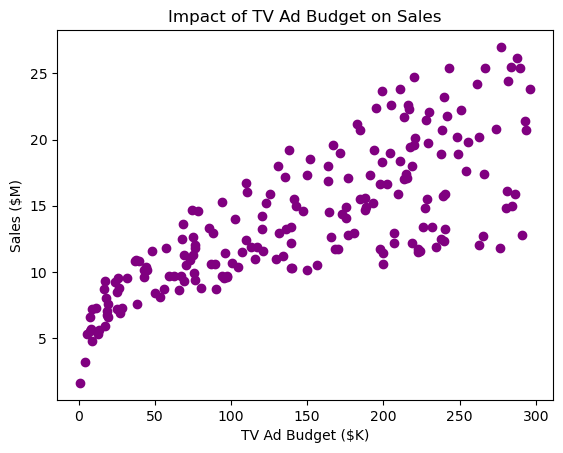

In [16]:
plt.scatter(x='TV Ad Budget ($)', y='Sales ($)', data=dfcopy, color="purple")
plt.xlabel('TV Ad Budget ($K)')
plt.ylabel('Sales ($M)')
plt.title('Impact of TV Ad Budget on Sales')
plt.show()

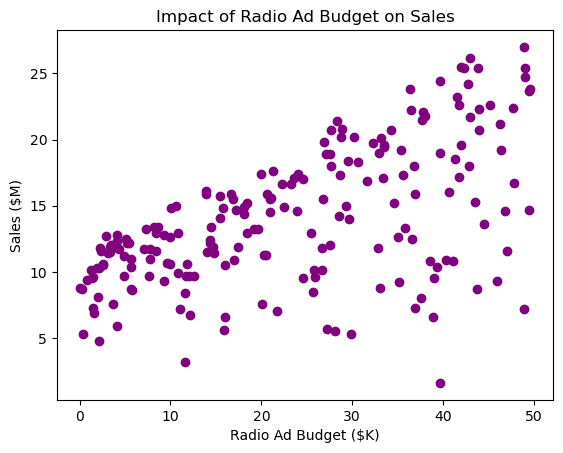

In [20]:
plt.scatter(dfcopy['Radio Ad Budget ($)'],dfcopy['Sales ($)'],color="purple")
plt.xlabel('Radio Ad Budget ($K)')
plt.ylabel('Sales ($M)')
plt.title('Impact of Radio Ad Budget on Sales')
plt.show()

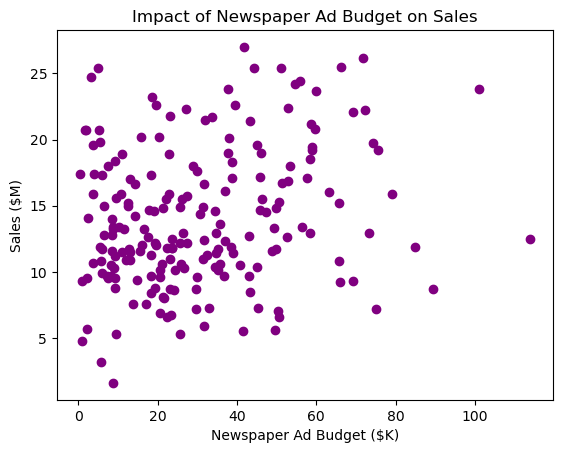

In [19]:
plt.scatter(dfcopy['Newspaper Ad Budget ($)'],dfcopy['Sales ($)'],color="purple")
plt.xlabel('Newspaper Ad Budget ($K)')
plt.ylabel('Sales ($M)')
plt.title('Impact of Newspaper Ad Budget on Sales')
plt.show()

<Axes: >

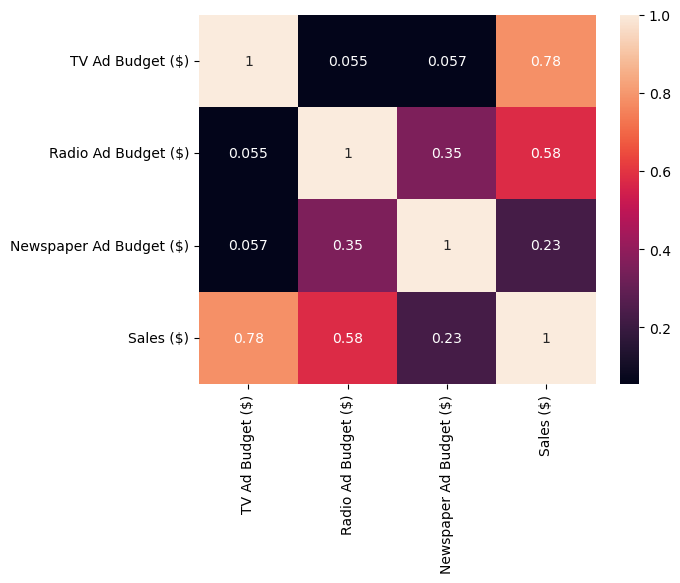

In [22]:
sns.heatmap(dfcopy.corr(),annot=True)

Text(0.5, 1.0, 'Impact of Medium of Ad on Sales')

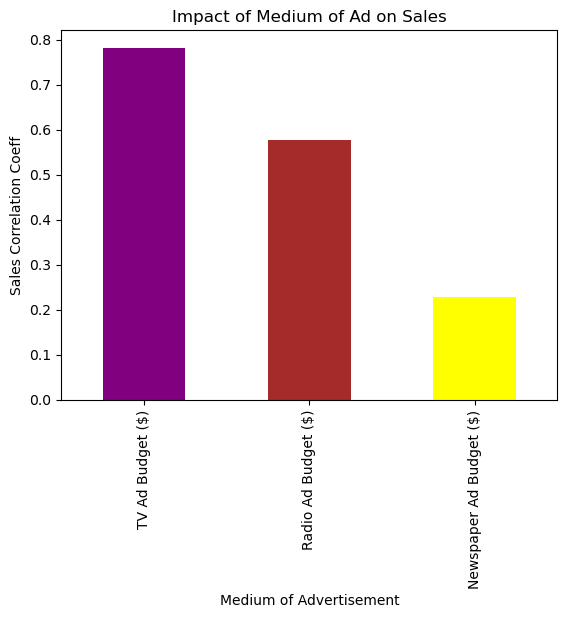

In [33]:
colors=['purple','brown','yellow']
dfcopy.corr()['Sales ($)'][:3].plot(kind='bar',color=colors)
plt.xlabel('Medium of Advertisement')
plt.ylabel('Sales Correlation Coeff')
plt.title('Impact of Medium of Ad on Sales')

# Feature Selection

In [36]:
X=dfcopy[['TV Ad Budget ($)','Radio Ad Budget ($)','Newspaper Ad Budget ($)']]
y=dfcopy['Sales ($)']

In [38]:
X.shape

(200, 3)

In [39]:
y.shape

(200,)

In [40]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
X_train.shape

(160, 3)

In [44]:
X_test.shape

(40, 3)

# Train the model

In [48]:
from sklearn.linear_model import LinearRegression 

In [49]:
model=LinearRegression()

In [50]:
model.fit(X_train,y_train)

LinearRegression()

In [51]:
model.intercept_

2.979067338122631

In [52]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

In [53]:
y_pred=model.predict(X_test)

In [54]:
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [55]:
#Compare predictions with actual values
comparison_df=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
print(comparison_df.to_string())

     Actual  Predicted
95     16.9  16.408024
15     22.4  20.889882
30     21.4  21.553843
158     7.3  10.608503
128    24.7  22.112373
115    12.6  13.105592
69     22.3  21.057192
170     8.4   7.461010
174    11.5  13.606346
45     14.9  15.155070
66      9.5   9.048320
182     8.7   6.653283
165    11.9  14.345545
78      5.3   8.903493
186    10.3   9.689590
177    11.7  12.164944
56      5.5   8.736284
152    16.6  16.265073
82     11.3  10.277596
68     18.9  18.831091
124    19.7  19.560367
16     12.5  13.251035
148    10.9  12.336207
93     22.2  21.306951
65      9.3   7.827403
60      8.1   5.809574
84     21.7  20.757532
67     13.4  11.981381
125    10.6   9.183496
132     5.7   8.506699
9      10.6  12.466468
18     11.3  10.003377
55     23.7  21.387671
75      8.7  12.249664
150    16.1  18.266615
104    20.7  20.137663
135    11.6  14.055140
137    20.8  20.854112
164    11.9  11.017444
76      6.9   4.568996


# Model Evaluation

In [56]:
from sklearn import metrics

In [57]:
mae=metrics.mean_absolute_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
rmse=metrics.mean_squared_error(y_test,y_pred,squared=False)
r2_score=metrics.r2_score(y_test,y_pred)
print(f"mean absolute error:{mae}")
print(f"mean squared error:{mse}")
print(f"root mean squared error:{rmse}")
print(f"r2_score:{r2_score}")

mean absolute error:1.4607567168117601
mean squared error:3.1740973539761073
root mean squared error:1.781599661533451
r2_score:0.8994380241009119


# visualization

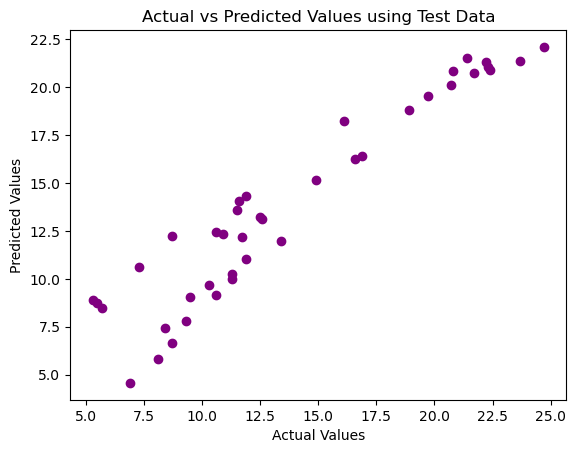

In [59]:
plt.scatter(y_test,y_pred,color="purple")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title('Actual vs Predicted Values using Test Data')
plt.show()

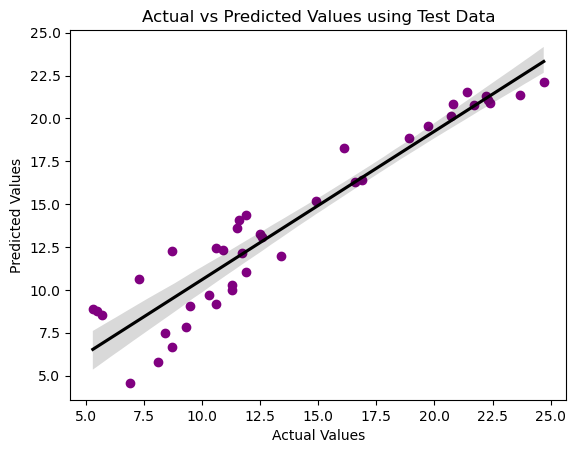

In [66]:
plt.scatter(y_test,y_pred,color="purple")
sns.regplot(x=y_test, y=y_pred, scatter=False, color='black')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title('Actual vs Predicted Values using Test Data')
plt.show()